In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
#可以製作互動式圖表的套件
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot,init_notebook_mode
#為可以將pandas和plotly結合的套件
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [4]:
calendar = pd.read_csv('/Users/Dennis/Downloads/calendar.csv')
print('我們有',calendar.date.nunique() , '天還有' , calendar.listing_id.nunique() ,'不同的清單在我們的calendar中')

我們有 366 天還有 10067 不同的清單在我們的calendar中


In [6]:
calendar.date.min() , calendar.date.max()

('2019-06-30', '2020-06-29')

In [7]:
calendar.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0      642748  2019-06-30         t  $438.00        $438.00             1.0   
1      642748  2019-07-01         f  $438.00        $438.00             1.0   
2      642748  2019-07-02         f  $438.00        $438.00             1.0   
3      642748  2019-07-03         f  $438.00        $438.00             1.0   
4      642748  2019-07-04         f  $438.00        $438.00             1.0   

   maximum_nights  
0          1125.0  
1          1125.0  
2          1125.0  
3          1125.0  
4          1125.0

所以我們就有了接下來一年的Airbnb住房資料，列出了id、詳細日期、定價>

這邊的f , t分別代表Falae與True，就是可不可以入住的意思。

In [8]:
calendar.available.value_counts().iplot(kind = 'bar' , title = 'Available ratio')

從這邊我們也可以看到兩者蠻接近的，即是說目前還有許多房是可以訂的。既然如此，我們也想看看淡旺季的表現如何：

/Users/Dennis/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



Text(0, 0.5, '%Busy')

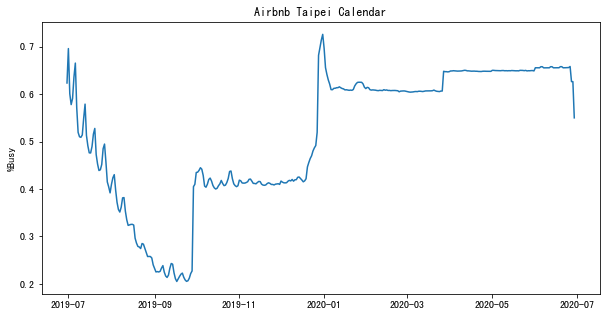

In [9]:
new_calendar = calendar[['date' , 'available']]
#available : False，代表說是旺季（比較熱門）
new_calendar['busy'] = new_calendar.available.map(lambda x:0 if x == 't' else 1)
new_calendar = new_calendar.groupby('date')['busy'].mean().reset_index()

new_calendar['date'] = pd.to_datetime(new_calendar['date'])

plt.figure(figsize = (10 , 5))
plt.plot(new_calendar['date'] , new_calendar['busy'])
plt.title('Airbnb Taipei Calendar')
plt.ylabel('%Busy')



暑假一整個跌很多（學生都出去玩了），但是到了聖誕節左右又會急劇上升，可能是因為歲末到台北跨年的人很多。然後約莫到1月會有一個高峰，二月的春節期間也有一點小波動。

In [10]:
#處理一下價格資料
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',','').str.replace('$' , '').astype(float)

mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B') , sort = False)['price'].mean()

Text(0, 0.5, 'Month')

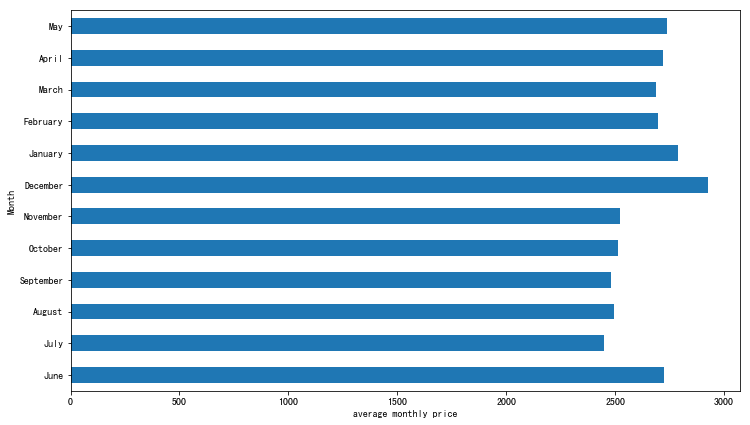

In [11]:
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price')
plt.ylabel('Month')

我們可以觀察到十二月是最高的，效果持續到一月（一月是價格第二高的月份）
而五、六月價格也蠻高的，可能是因為國外比較早放暑假的關係，大家比較可能在六月來台灣玩。
那我們其實可以這樣想，如果是本地人通常會是假日才比較有可能去住Airbnb，但是國外旅客可以在平日去住Airbnb，所以看一下週間的熱門程度。

In [12]:
calendar['dayofweek'] = calendar.date.dt.weekday_name
cats = calendar.dayofweek.unique().tolist()
price_week = calendar.groupby('dayofweek')['price'].mean().reindex(cats)
price_week.iplot(title = '大家都是禮拜五、六粗乃玩')

嗯？似乎還是假日比較多人哦！所以可以推測Airbnb在台灣的使用者算是蠻高的，不過比較特別的是禮拜二有個小小高峰，我們可以猜測禮拜二是否有什麼節日，根據我們剛剛推算的Busy程度，這時候我想說：「該不會那天是跨年吧？」 

去查日曆發現：真的！今年(2019)的12月31日剛好在禮拜二哦！可見一月為何是Busy高峰的假設似乎蠻合理的，在年末會有一批人湧入台北城跨年，而聖誕節在禮拜三，也就是說前一週的禮拜二晚上是平安夜，台北的耶誕城應該也吸引了不少人來。

# 其他資料

In [13]:
listing = pd.read_csv('/Users/Dennis/Downloads/listings.csv')
print('We have' , listing.id.nunique() , 'listings in the listing data')
listing.head(3)

We have 10067 listings in the listing data


/Users/Dennis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.



id                         listing_url       scrape_id last_scraped  \
0  68396  https://www.airbnb.com/rooms/68396  20190630183138   2019-06-30   
1  68398  https://www.airbnb.com/rooms/68398  20190630183138   2019-06-30   
2  74643  https://www.airbnb.com/rooms/74643  20190630183138   2019-06-30   

                                 name  \
0  Zhongxiao Dunhua Studio C near MRT   
1           Tonghua Vacation Studio C   
2                       小巨蛋｡南京復興站溫馨套房   

                                             summary  \
0  Prime location! Right in the center of Taipei'...   
1  Convenient location; close to MRT and walking ...   
2  小巨蛋對面,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨;私人衛浴套房...   

                                               space  \
0  Located at Zhongxiao East Road of Daan distric...   
1  Private Studio apartment with ensuite bathroom...   
2  歡迎來台北,我們的小提琴工作室就在一旁,如果有興趣,我們很樂意和客人互動! 你的套房裡有清爽...   

                                         description experiences_offered  \
0  Prime location! Right in the center of Taipei'...                none   
1  Convenient location; close to MRT and walking ...                none   
2  小巨蛋對面,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨;私人衛浴套房...                none   

                               neighborhood_overview  ... instant_bookable  \
0                                                NaN  ...                f   
1  Locates in a quiet neighborhood of Tonghua Str...  ...                f   
2                     微風南京,台北小巨蛋｡ 南京復興捷運站,兄弟飯店,文華飯店｡  ...                f   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   

   calculated_host_listings_count  \
0                              12   
1                              12   
2                               3   

   calculated_host_listings_count_entire_homes  \
0                                           12   
1                                           12   
2                                            0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            3   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.03  
1                                            0               0.09  
2                                            0               0.51  

[3 rows x 106 columns]

106欄位的資料！感覺就可以挖很多有趣的insight！

In [14]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10067 entries, 0 to 10066
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 8.1+ MB


In [15]:
grouped_df = listing.groupby('neighbourhood_cleansed').count()[['id']].sort_values('id' , ascending = False).head(10)
grouped_df.iplot(kind = 'bar' ,title='哪個區最多房源？')

萬華、大安、中山位列前三名！看到這裡我們就可以大致圈出哪邊房源最多，剛好是以台北車站為中心，向外輻射出的圓圈區域。這點是很合理的，北車是交通樞紐，又在捷運的中樞交匯處：<圖片>

而文山、北投這些相對台北市中心比較邊陲的地方房源就相當少，畢竟比較少遊客會去這些地方(?



/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



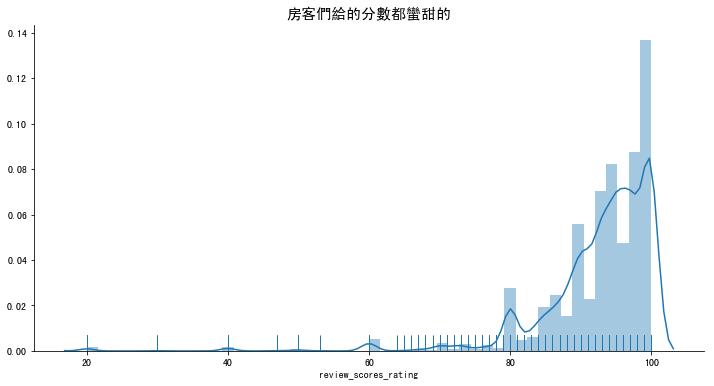

In [16]:
plt.figure(figsize = (12 , 6))
plt.title('房客們給的分數都蠻甜的' , fontsize = 15)
sns.distplot(listing.review_scores_rating.dropna() , rug = True)
sns.despine()

大多數人還是會給蠻高的評價，跟App store一樣XXD

count     10067.000000
mean       2498.357306
std        8772.704847
min          62.000000
25%         992.000000
50%        1519.000000
75%        2511.000000
max      309977.000000
Name: price, dtype: float64


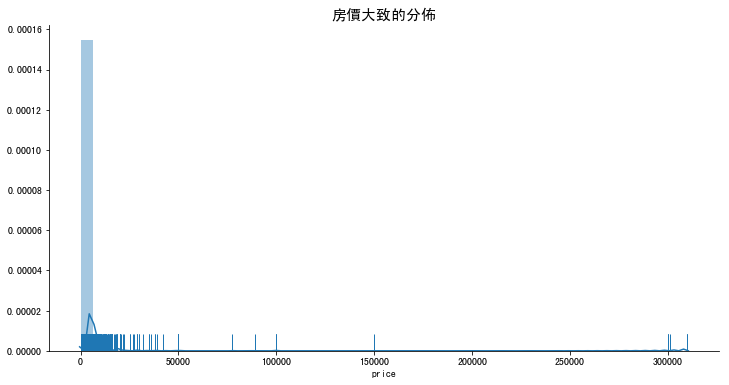

In [17]:
listing['price'] = listing['price'].str.replace(',' , '').str.replace('$' , '').astype(float)

print(listing.price.describe())
plt.figure(figsize = (12 , 6))
plt.title('房價大致的分佈' , fontsize = 15)
sns.distplot(listing.price.dropna() , rug = True)
sns.despine()

平均2498就可以住一晚，比大多數旅館便宜一些，這點倒是Airbnb的優勢。
但是我們發現標準差太高了，所以看中位數準確一些，是1519元，那是真的比飯店旅館便宜許多。
甚至到了75百分位數的價格也才2511元，對於背包客是相當划算。這也是為何Airbnb是許多國外遊客的首選，除了有跨國的平台保障，最重要的是相當經濟實惠。

最低62（一碗牛肉湯麵..?）、最高接近31萬，這邊我就很好奇這兩家的特色XD
我們把它們調出來看看：

In [18]:
listing[listing.price > 290000]

id                            listing_url       scrape_id  \
417    3783777   https://www.airbnb.com/rooms/3783777  20190630183138   
506    4412881   https://www.airbnb.com/rooms/4412881  20190630183138   
553    4607827   https://www.airbnb.com/rooms/4607827  20190630183138   
589    4738149   https://www.airbnb.com/rooms/4738149  20190630183138   
1237   8525791   https://www.airbnb.com/rooms/8525791  20190630183138   
2637  14919394  https://www.airbnb.com/rooms/14919394  20190630183138   
4541  21711457  https://www.airbnb.com/rooms/21711457  20190630183138   

     last_scraped                                       name  \
417    2019-06-30                             Room in Beitou   
506    2019-06-30        市府捷運站Metro TaipeiCityHall Cozy room   
553    2019-06-30        市府捷運站Metro Taipei CityHall bunk bed   
589    2019-06-30         市府捷運站Metro TaipeiCityHall Bunk bed   
1237   2019-06-30                                        NaN   
2637   2019-06-30  Nice apartment, Near MRT Songshan Airport   
4541   2019-06-30                       Habitat of Wanderers   

                                                summary  \
417   It's my house. Old style taiwanese room in old...   
506   訂房前請先讀所有事項Important!!! Before you booking the ...   
553   訂房前請先讀所有事項 Important!!! Before you booking the...   
589   Please check my other listings as well,as I of...   
1237                                               交通便宜   
2637  Mon logement est proche de parcs, le centre vi...   
4541                                                 Hi   

                                                  space  \
417                                                 NaN   
506   The room size: 210 CM * 195 CM The room only p...   
553   *The room equipped with solid wood floor and b...   
589   *The room equipped with TV & solid wood floor ...   
1237                                                NaN   
2637  It's located right in the heart of sophicated ...   
4541                                                NaN   

                                            description experiences_offered  \
417   It's my house. Old style taiwanese room in old...                none   
506   訂房前請先讀所有事項Important!!! Before you booking the ...                none   
553   訂房前請先讀所有事項 Important!!! Before you booking the...                none   
589   Please check my other listings as well,as I of...                none   
1237                                               交通便宜                none   
2637  Mon logement est proche de parcs, le centre vi...                none   
4541                                                 Hi                none   

                                  neighborhood_overview  ... instant_bookable  \
417                                                 NaN  ...                f   
506   During you stay, you are recommended to visit ...  ...                f   
553   During you stay, you are recommended to visit ...  ...                f   
589   During you stay, you are recommended to visit ...  ...                f   
1237                                                NaN  ...                f   
2637  There are a nice and quite famous restaurant c...  ...                t   
4541                                                NaN  ...                t   

     is_business_travel_ready          cancellation_policy  \
417                         f  strict_14_with_grace_period   
506                         f  strict_14_with_grace_period   
553                         f  strict_14_with_grace_period   
589                         f  strict_14_with_grace_period   
1237                        f                     flexible   
2637                        f                     flexible   
4541                        f                     flexible   

     require_guest_profile_picture require_guest_phone_verification  \
417                              f                                f   
506                              f             

哦！看到有些描述：t's my house. Old style taiwanese room in old taiwan culture town Beitou. only for TV program and movie, not for live inside.

只租給電影劇組,不提供住宿｡

原來29萬是借給片場拍片用的！還有尊絕不凡信義區的住宅可以住，不過31萬個人還是覺得太貴了。國外一個月的租金可能差不多五萬左右吧，31萬可以住超過一學期。

所以我們將高於50,000的房源去掉再畫一次！看看大致的住一晚房價分佈。

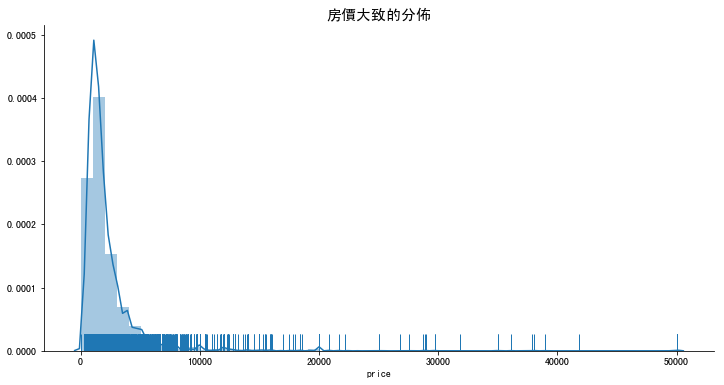

In [19]:
plt.figure(figsize = (12 , 6))
plt.title('房價大致的分佈' , fontsize = 15)
sns.distplot(listing[listing.price < 50000].price.dropna() , rug = True)
sns.despine()

Text(0.5, 1.0, '便宜實惠的房價們')

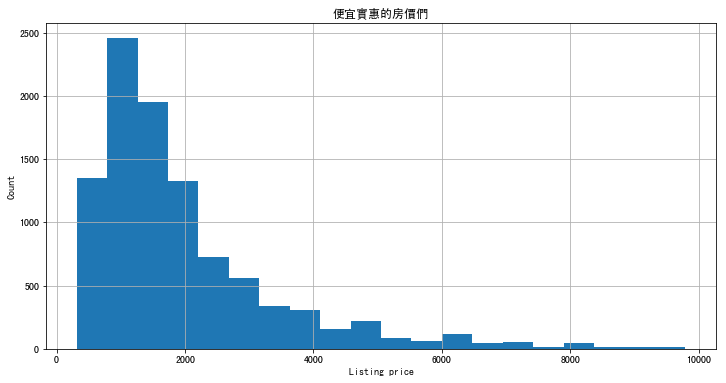

In [20]:
plt.figure(figsize = (12,6))
listing.loc[(listing.price < 10000) & (listing.price > 300)].price.hist(bins  = 20)
plt.ylabel('Count')
plt.xlabel('Listing price')
plt.title('便宜實惠的房價們')

各個區域的房價分佈又是如何呢？比如尊爵不凡信義區的價格感覺就相當高。

In [21]:
listing.neighbourhood_cleansed

0        大安區
1        大安區
2        松山區
3        中正區
4        大安區
5        大安區
6        文山區
7        大安區
8        中山區
9        中山區
10       大安區
11       大安區
12       松山區
13       大安區
14       大安區
15       大安區
16       大安區
17       中山區
18       中正區
19       中正區
20       大安區
21       士林區
22       大安區
23       大安區
24       大安區
25       北投區
26       內湖區
27       中正區
28       萬華區
29       萬華區
        ... 
10037    中山區
10038    中正區
10039    南港區
10040    大安區
10041    萬華區
10042    中山區
10043    萬華區
10044    松山區
10045    萬華區
10046    萬華區
10047    中正區
10048    萬華區
10049    大安區
10050    中山區
10051    中山區
10052    中山區
10053    信義區
10054    中山區
10055    信義區
10056    內湖區
10057    士林區
10058    中正區
10059    大安區
10060    大安區
10061    萬華區
10062    萬華區
10063    信義區
10064    大安區
10065    大同區
10066    信義區
Name: neighbourhood_cleansed, Length: 10067, dtype: object

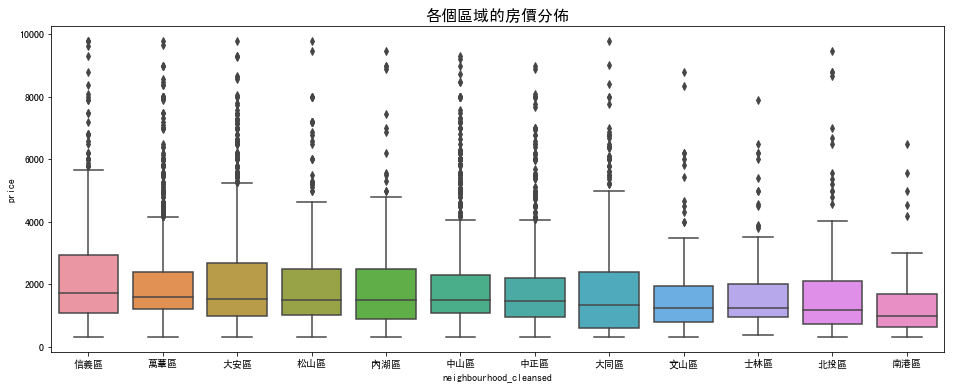

In [22]:
drop_outlier_price_condition = listing.loc[(listing.price<=10000) & (listing.price > 300)]
sort_price = drop_outlier_price_condition\
        .groupby('neighbourhood_cleansed')['price']\
        .median()\
        .sort_values(ascending = False)\
        .index
plt.figure(figsize = (16 , 6))   
plt.title('各個區域的房價分佈' , fontsize = 16)
sns.boxplot(y='price' , x = 'neighbourhood_cleansed' , data = drop_outlier_price_condition , order=  sort_price)

發現其實沒有特別高哦！而且各個區域都有蠻多的離群值，不過信義、大安這些比較熱門的區域的確是差異比較大一些（box拉得頗長）

# 不動產屬性又是如何？

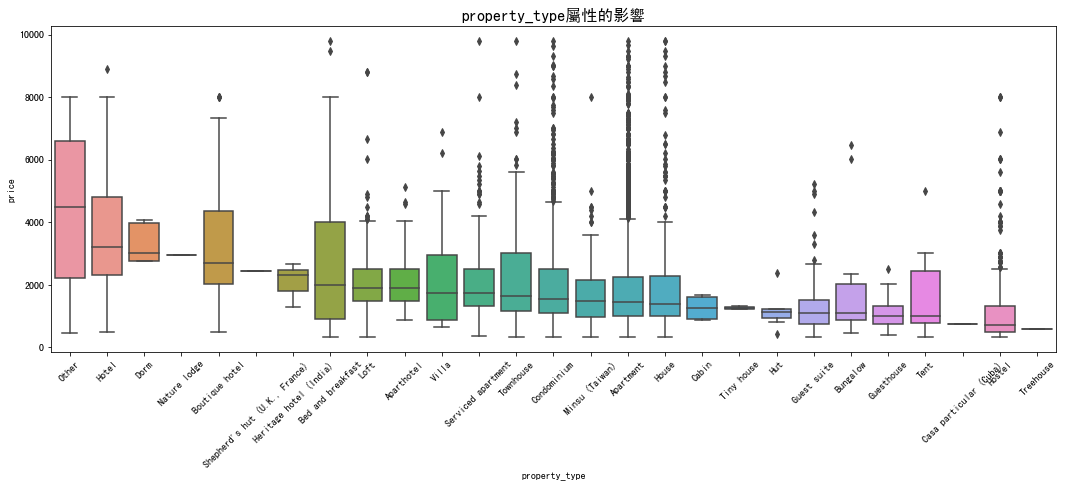

In [23]:
def boxplot_to_price(category_name):
    sort_price = drop_outlier_price_condition\
                .groupby(category_name)['price']\
                .median()\
                .sort_values(ascending = False)\
                .index


    plt.figure(figsize = (18,6))
    plt.title( category_name +'屬性的影響' , fontsize = 16)
    sns.boxplot(y=  'price' , x=  category_name , data = drop_outlier_price_condition , order = sort_price)
    plt.xticks(rotation = 45)

boxplot_to_price('property_type')

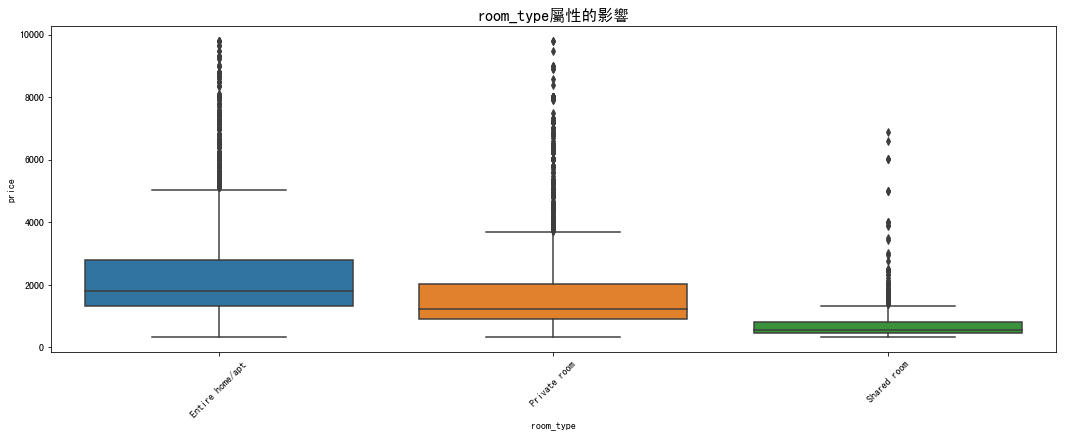

In [24]:
boxplot_to_price('room_type')

台北的價格真的一堆離群點XDD


這裡不知道是什麼原因，照理說住整棟（一套民宿）應該會比拆分一棟民宿（private room）貴上很多，但是兩者相差沒有到差很多。
不如說private room其實沒有到那麼貴才對，可能是因為台北的房價本來就有許多不合理的地方。

In [25]:
drop_outlier_price_condition.pivot(columns = 'property_type' , values ='price').iplot(kind = 'box')


In [26]:
grouped_df = drop_outlier_price_condition.pivot(columns = 'room_type' , values ='price')

grouped_df.iplot(kind = 'hist' , title = '有些private room 的確偏貴')

我們可以發現private room的確「越界」了，而且在5000、8000左右的房價蠻多的。


Airbnb一開始其實是Airbed and breakfast的意思，當初是聯合創始人Joe Gebbia和Brian Chesky因為繳不起房租，在自己的公寓擺了幾張氣墊床出租給來舊金山參加會議，因酒店爆滿而找不到地方住的旅行者們。

所以，到了今天，床的類型會如何影響租房價格呢？

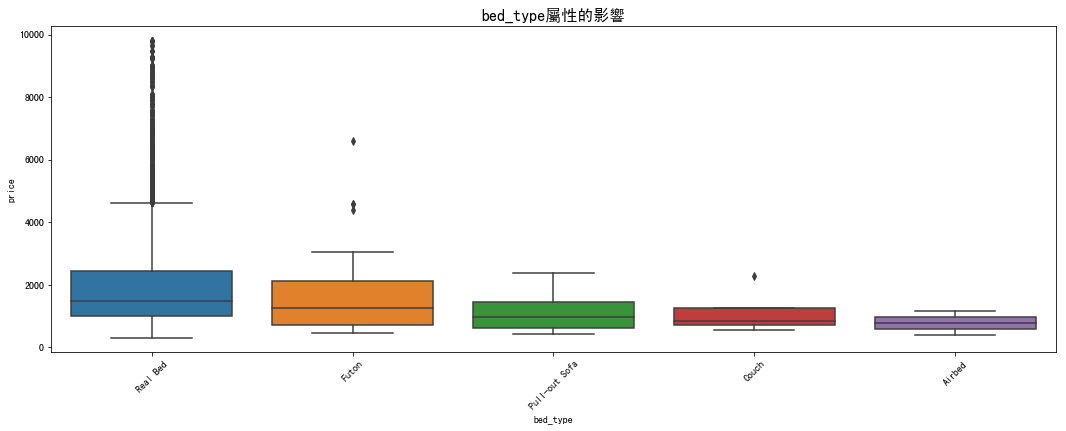

In [27]:
boxplot_to_price('bed_type')

沒想到，居然沒什麼差！可能氣墊床對大家來說是個特別的體驗，價格沒有特別低！

有鋪床、日式（榻榻米嗎？）、床型沙發（之前去朋友家，躺在上面超舒服）、沙發、氣墊床

可是這樣，對舒適度沒有影響嗎？鋪床不是比較好睡嗎(?我想可能是因為資料不平均，所以這邊看不出什麼差異。

In [28]:
listing['amenities'] = listing.amenities.str.replace('[{}]' , '').str.replace('"','')
listing.amenities.head()

0    TV,Cable TV,Internet,Wifi,Air conditioning,Whe...
1    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
2    TV,Cable TV,Internet,Wifi,Air conditioning,Pai...
3    Cable TV,Internet,Wifi,Air conditioning,Wheelc...
4    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
Name: amenities, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

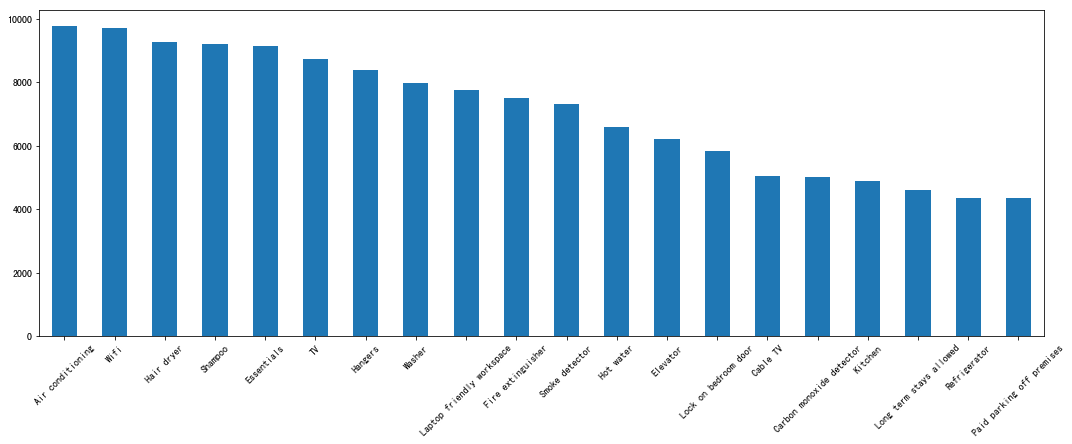

In [29]:
all_item_ls = np.concatenate(listing.amenities.map(lambda am:am.split(',')))
Top20_item = pd.Series(all_item_ls).value_counts().head(20)
plt.figure(figsize=  (18 , 6))
Top20_item.plot(kind = 'bar')
plt.xticks(rotation = 45)

冷氣跟Wifi果然是標配！出去玩回到房間，果然就是要舒舒服服躺在床上整理照片、看一下明天的行程等等......吹風機提供的量也蠻高的，但是洗衣機只有大概80%的房屋有提供...它其實應該要算是旅行的標配之一。


值得一提的是，國外的Airbnb相當注重有沒有Kitchen、Smoke detector，台灣在這方面大概只有一半的Airbnb有提供，感覺是可以優化的地方。

接下來我們看看比較貴的房屋都有提供哪些物件。

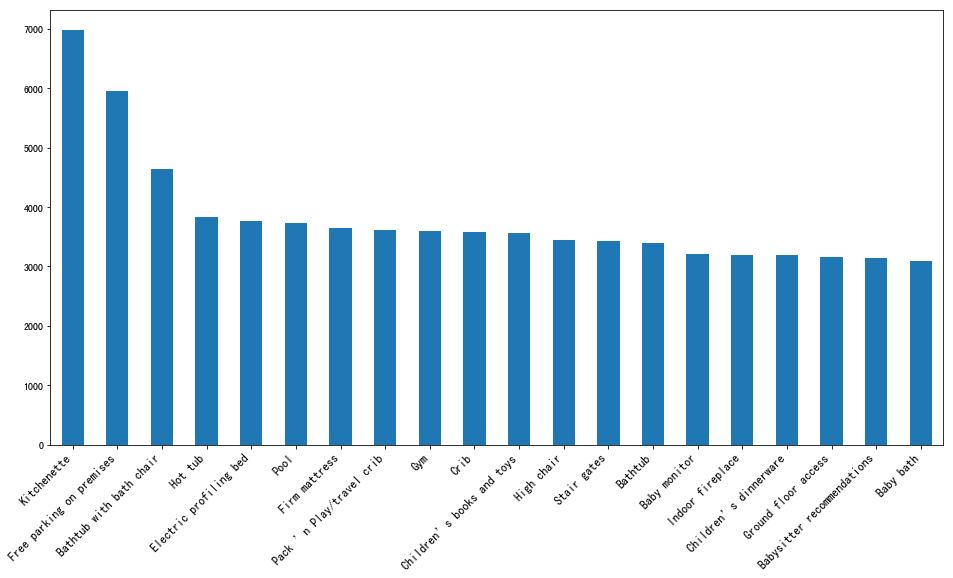

In [30]:
amenities = np.unique(np.concatenate(listing['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, listing[listing['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])
plt.figure(figsize= (16,8))
amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()

哦，我們發現高價的房屋大部分都有提供廚房、浴缸、還有ㄜ....Electronic profiling bed ，這個不曉得怎麼翻比較好。

還有一個蠻特別的就是，增加了Crib、Baby monitor、Baby bath、Books and toys等等....所以可以看到高價房的特徵就是比較適合帶幼幼童的父母們，多考慮了寶寶這個點以及附有兒童相關設施。

Text(0.5, 0, 'Listing price')

<Figure size 1296x432 with 0 Axes>

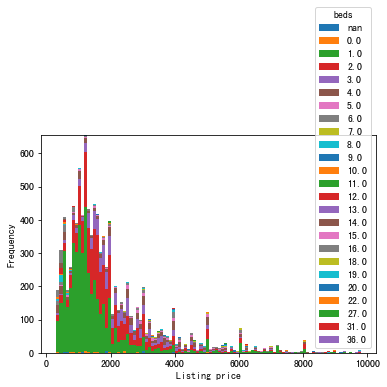

In [31]:
plt.figure(figsize = (18 , 6))
drop_outlier_price_condition.pivot(columns='beds' , values = 'price')\
.plot( kind = 'hist', stacked = True, bins =100)
plt.xlabel('Listing price')

大部分都是以單人床為主

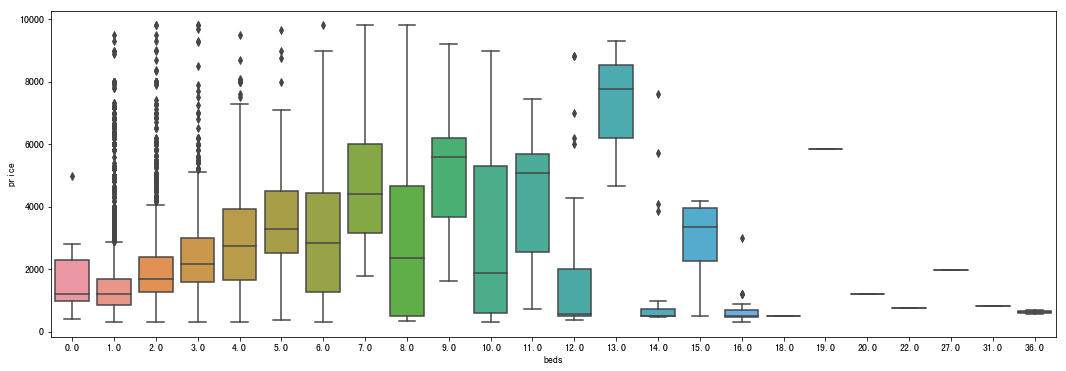

In [32]:
plt.figure(figsize = (18,6))
sns.boxplot(y=  'price' , x=  'beds' , data = drop_outlier_price_condition)
plt.show()

為什麼沒有床跟有床的價格差不多，睡地板XD?
那我們也可以發現8、10、12、14、16張床應該就是大通舖，所以價格突然降低。
其他比較多張床的應該就是租下整棟透天Airbnb。

# 看一下連續變量

In [33]:
continual_var = listing.select_dtypes(np.number).columns
no_null_col = drop_outlier_price_condition[continual_var].isnull().sum()==0
no_null_col = no_null_col[no_null_col == True].index.tolist()

#移除掉id類別的變量
no_null_col = no_null_col[3:]

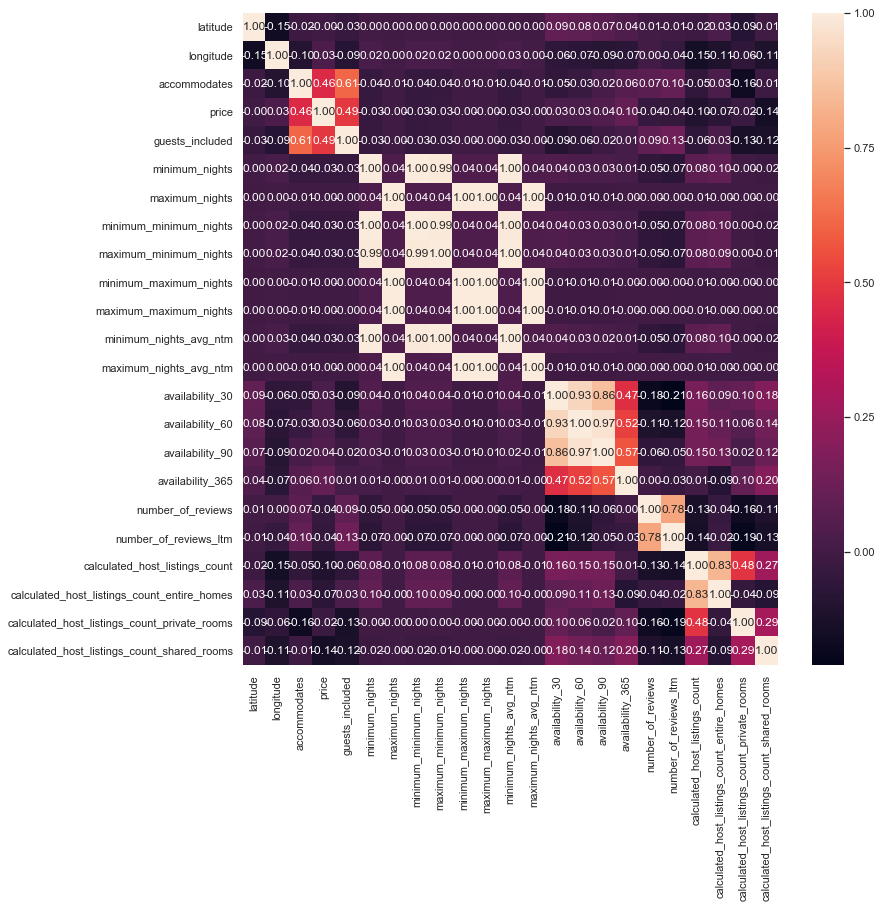

In [34]:
corr = drop_outlier_price_condition[no_null_col].dropna().corr()
plt.figure(figsize = (12,12))
sns.set(font_scale = 1)
sns.heatmap(corr , cbar=True , annot = True  , fmt = '.2f')

看到price那行，我們可以發現guests included 以及accommodates跟price蠻有關係的。

# 嘗試建立定價模型


接下來我們把自己當作Airbnb的資料科學家，嘗試一下定價模型的建立。
那第一步還是清資料，將離群值、NaN值太多的變數刪掉。
另外重複值太多的變數也要刪掉，因為如果表現不出差異性，其實對模型的學習是沒什麼幫助的。

In [35]:
#把離群值拿掉來建模
listing = drop_outlier_price_condition

#刪除NaN值
no_null_col = listing.isnull().sum()==0
no_null_col = no_null_col[no_null_col == True].index.tolist()
#放回去listing
listing = listing[no_null_col]

我們還要對文字變量分詞與編碼，這部分利用詞頻統計就好囉！

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

listing.amenities = listing.amenities.str.replace('[{}]','').str.replace('"' , '')
#用 " , " 分隔就可以很輕鬆分好詞囉！
count_vectorizer = CountVectorizer(tokenizer=lambda x:x.split(','))
amenities = count_vectorizer.fit_transform(listing.amenities)
df_amenities = pd.DataFrame(amenities.toarray() , 
                            columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('' , 1)

# Encoding and process category variable

In [37]:
continual_var = listing.select_dtypes(np.number).columns.drop(['id','scrape_id', 'host_id']).tolist()

cat_var = []
for col in listing.columns :
    if col not in continual_var:
        cat_var.append(col)
    
#看一下哪些變量對建模是沒什麼幫助的
cat_var

#挑出這些跟連續變量中的id，基本上資料一致（比如國家都是臺灣）、差異太多的變數對建模都沒什麼幫助。
useless_var = ['id','host_id',
 'scrape_id' ,'listing_url' ,'picture_url','host_url','country_code', 'country',
               'experiences_offered','street','smart_location'
           
              
              
              
              ]
final_cat_var = []
for var in cat_var:
    if var not in useless_var:
        final_cat_var.append(var)
final_cat_var


df = listing[final_cat_var + continual_var]
df[final_cat_var]

last_scraped                                 host_verifications  \
0       2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   
1       2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   
2       2019-06-30  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
3       2019-06-30          ['email', 'phone', 'facebook', 'reviews']   
4       2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   
5       2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'jum...   
6       2019-06-30  ['email', 'phone', 'reviews', 'jumio', 'govern...   
7       2019-06-30  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
8       2019-06-30  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
9       2019-06-30  ['email', 'phone', 'manual_online', 'facebook'...   
10      2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'jum...   
11      2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'jum...   
12      2019-06-30  ['email', 'phone', 'reviews', 'jumio', 'govern...   
13      2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   
14      2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   
15      2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   
16      2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   
17      2019-06-30  ['email', 'phone', 'facebook', 'offline_govern...   
18      2019-06-30          ['email', 'phone', 'facebook', 'reviews']   
19      2019-06-30          ['email', 'phone', 'facebook', 'reviews']   
20      2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   
21      2019-06-30  ['email', 'phone', 'reviews', 'manual_offline'...   
22      2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   
23      2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   
24      2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   
25      2019-06-30          ['email', 'phone', 'facebook', 'reviews']   
26      2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'man...   
27      2019-06-30  ['email', 'phone', 'reviews', 'jumio', 'govern...   
28      2019-06-30          ['email', 'phone', 'facebook', 'reviews']   
29      2019-06-30          ['email', 'phone', 'facebook', 'reviews']   
...            ...                                                ...   
10037   2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'man...   
10038   2019-06-30  ['email', 'phone', 'jumio', 'offline_governmen...   
10039   2019-06-30                                 ['email', 'phone']   
10040   2019-06-30  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
10041   2019-06-30  ['email', 'phone', 'reviews', 'jumio', 'selfie...   
10042   2019-06-30  ['email', 'phone', 'offline_government_id', 's...   
10043   2019-06-30  ['email', 'phone', 'reviews', 'jumio', 'selfie...   
10044   2019-06-30  ['email', 'phone', 'google', 'reviews', 'jumio...   
10045   2019-06-30  ['email', 'phone', 'reviews', 'offline_governm...   
10046   2019-06-30  ['email', 'phone', 'reviews', 'offline_governm...   
10047   2019-06-30                                 ['email', 'phone']   
10048   2019-06-30  ['email', 'phone', 'reviews', 'selfie', 'ident...   
10049   2019-06-30  ['email', 'phone', 'google', 'reviews', 'jumio...   
10050   2019-06-30                              ['phone', 'facebook']   
10051   2019-06-30                     ['email', 'phone', 'facebook']   
10052   2019-06-30                     ['email', 'phone', 'facebook']   
10053   2019-06-30                                 ['email', 'phone']   
10054   2019-06-30  ['email', 'phone', 'jumio', 'offline_governmen...   
10055   2019-06-30                                 ['email', 'phone']   
10056   2019-06-30  ['email', 'phone', 'offline_government_id', 's...   
10057   2019-06-30                                          ['phone']   
10058   2019-06-30  ['email', 'phone', 'offline_government_id', 's...   
10059   2019-06-30                                          ['ph

In [38]:
# 先將True False 作轉換
columns =  [ 'has_availability' ,'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification',
           'is_business_travel_ready',
           ]
for c in columns:
    df[c] = df[c].replace('f',0,regex=True)
    df[c] = df[c].replace('t',1,regex=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9869 entries, 0 to 10066
Data columns (total 41 columns):
last_scraped                                    9869 non-null object
host_verifications                              9869 non-null object
neighbourhood_cleansed                          9869 non-null object
is_location_exact                               9869 non-null int64
property_type                                   9869 non-null object
room_type                                       9869 non-null object
bed_type                                        9869 non-null object
amenities                                       9869 non-null object
extra_people                                    9869 non-null object
calendar_updated                                9869 non-null object
has_availability                                9869 non-null int64
calendar_last_scraped                           9869 non-null object
requires_license                                9869 non-null int6

In [40]:
df = pd.concat([df , df_amenities] , axis = 1 , join = 'inner')
df.head()

last_scraped                                 host_verifications  \
0   2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   
1   2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   
2   2019-06-30  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
3   2019-06-30          ['email', 'phone', 'facebook', 'reviews']   
4   2019-06-30  ['email', 'phone', 'facebook', 'reviews', 'off...   

  neighbourhood_cleansed  is_location_exact property_type        room_type  \
0                    大安區                  0     Apartment  Entire home/apt   
1                    大安區                  1     Apartment  Entire home/apt   
2                    松山區                  0   Guest suite     Private room   
3                    中正區                  0        Hostel      Shared room   
4                    大安區                  0          Loft  Entire home/apt   

   bed_type                                          amenities extra_people  \
0  Real Bed  TV,Cable TV,Internet,Wifi,Air conditioning,Whe...        $0.00   
1  Real Bed  TV,Cable TV,Internet,Wifi,Air conditioning,Kit...        $0.00   
2  Real Bed  TV,Cable TV,Internet,Wifi,Air conditioning,Pai...      $248.00   
3  Real Bed  Cable TV,Internet,Wifi,Air conditioning,Wheelc...      $350.00   
4  Real Bed  TV,Cable TV,Internet,Wifi,Air conditioning,Kit...      $465.00   

  calendar_updated  ...  well-lit path to entrance wheelchair accessible  \
0      5 weeks ago  ...                          0                     1   
1      7 weeks ago  ...                          0                     0   
2            today  ...                          0                     0   
3            today  ...                          0                     1   
4      3 weeks ago  ...                          0                     0   

   wide clearance to shower  wide doorway to guest bathroom  wide entrance  \
0                         0                               0              0   
1                         0                               0              0   
2                         0                               0              0   
3                         0                               0              0   
4                         0                               0              0   

  wide entrance for guests  wide entryway  wide hallways  wifi  window guards  
0                        0              0              0     1              0  
1                        0              0              0     1              0  
2                        0              0              0     1              0  
3                        0              0              0     1              0  
4                        0              0              0     1              0  

[5 rows x 168 columns]

# 更細緻地處理類別變量

TODO:
* host verifications : 刪去
* neighbourhood_cleansed  : mean encoding
* property_type : mean encoding ，有明顯差異
* amenities ：刪掉，已經轉one hot了
* room_type	:label encoding (似乎存在order relationship)
* bed_type	: label encoding （似乎存在order relationship）
* extra people : 轉換為連續變量
* calendar_update ：轉換為連續變量
* calendar_last_scraped : 刪掉
* cancellation_policy : mean encoding

In [41]:
#建立函數
from sklearn.preprocessing import LabelEncoder

def one_hot_encoder(feature ,df):
    count_vectorizer = CountVectorizer()
    this_feature = count_vectorizer.fit_transform(df[feature])
    temp_df = pd.DataFrame(this_feature.toarray() , 
                                columns=count_vectorizer.get_feature_names())
 
    return temp_df



def mean_encoder(df , obj_columns , obj_Y):
    for col in obj_columns:
        temp_df = df.groupby([col])[obj_Y].mean().reset_index()
        #將col . col_mean作為新的column
        temp_df.columns = [col , f"{col}_mean"]
        df = pd.merge(df , temp_df , on = col , how ='left')
        df = df.drop([col] , axis = 1)
    return df

In [42]:
#Label encoder
df['room_type'] = LabelEncoder().fit_transform(df['room_type'])
df['bed_type'] = LabelEncoder().fit_transform(df['bed_type'])

# drop
drop_ls = ['host_verifications','amenities','calendar_last_scraped'] 
df = df.drop(drop_ls , axis = 1)

#mean encoder
mean_ls = ['neighbourhood_cleansed' ,'property_type','cancellation_policy']
df = mean_encoder(df , mean_ls , 'price')

#發現還有漏網之魚，這些資料都沒有差異性
df = df.drop(['last_scraped','is_business_travel_ready' ,'has_availability','requires_license'] , axis = 1)

接下來處理extra people 、calendar_update ：轉換為連續變量。
不過calendar update有點棘手，我們想把資料轉換為以天為單位的連續資料。

In [43]:
temp_df = pd.DataFrame()
temp_df['raw'] = df['calendar_updated']
#先將today設為0
temp_df['raw'] = temp_df.raw.replace('today','0').str.replace('never','-1').str.replace('yesterday' , '1')
temp_df['raw'] = temp_df.raw.replace('a week ago' , '1 weeks ago')
#將day抽出
temp_df['days'] = temp_df['raw'].str.contains('day')
temp_df['days']=  temp_df.days.astype(str).map({'True':1 , 'nan':0 , 'False':0})

#將weeks抽出
temp_df['weeks'] = temp_df['raw'].str.contains('week')
temp_df['weeks']=  temp_df.weeks.astype(str).map({'True':7 , 'nan':0 , 'False':0})
#將月抽出
temp_df['months'] = temp_df['raw'].str.contains('months')
temp_df['months']=  temp_df.months.astype(str).map({'True':30 , 'nan':0 , 'False':0})
temp_df['raw'] = temp_df.raw.str[:2].astype(int)

temp_df = temp_df.replace(0,1)
df['calendar_updated'] = temp_df.raw*temp_df.days*temp_df.months*temp_df.weeks

# 清理缺失值

仔細看，我們發現extra people有少許缺失值，所以我們簡單用mode填補

In [50]:
print('缺失值數目' , df.isnull().sum().sum())
print('眾數' , df.extra_people.mode())
df.fillna(value = 0 , inplace=True)
print('缺失值數目' , df.isnull().sum().sum())
#處理extra people
df.extra_people = df.extra_people.str[:-3]
df.extra_people = df.extra_people.str.replace('$','')
df.extra_people = df.extra_people.str.replace(',','')
df.extra_people = df.extra_people.str.replace('.','')
df.extra_people = df.extra_people.astype(float)

缺失值數目 0
眾數 0    $0.00
dtype: object
缺失值數目 0


# 建模

這邊由於建模並非這份資料集的重點，因此我只會帶過基本的特徵處理、以及快速地建一個模型出來，也就是說這邊的model算是只做出一個baseline，如果要進行數據科學比賽，我個人的習慣還會搞剛許多、可能光是特徵工程就會分好幾篇來寫XXD
如果有大學～博士班也喜歡資料科學比賽的朋友可以一起交流！

In [51]:
#切分資料集
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale


y = df['price']
x = df.drop('price' , axis = 1)

#標準化數據
y = scale(y)
x = scale(x)

X_train , X_test , Y_train , Y_test = train_test_split(x ,y , test_size = 0.25 , random_state = 42)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by the scale function.



In [359]:
#建立Random forest的regression model
model = RandomForestRegressor(n_estimators= 200 , criterion='mse' ,
                              random_state= 42
                             )

model.fit(X_train , Y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_rf = (mean_squared_error(Y_test , y_test_pred))**(1/2)

print('RMSE test :%.3f'%rmse_rf)
print('R square test :%.3f '%(r2_score(Y_test , y_test_pred)))

/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by the scale function.



RMSE test :0.610
R square test :0.638 


Text(0.5, 1.0, 'Feature importance')

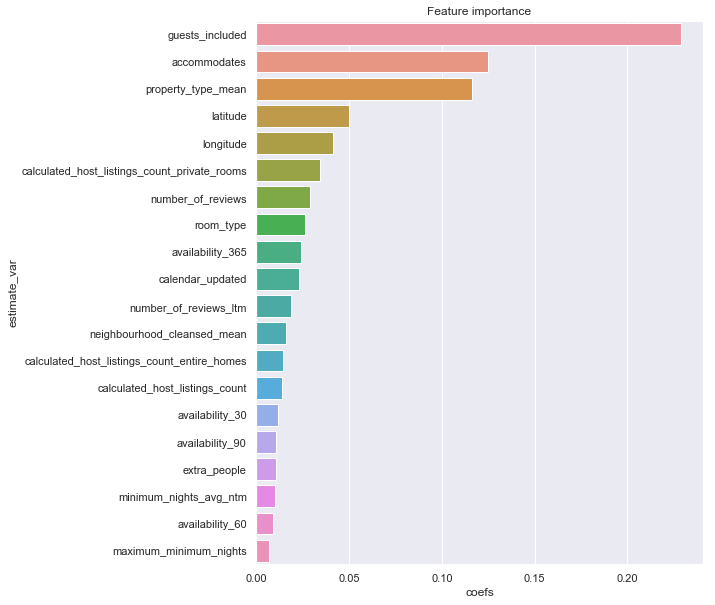

In [360]:
coefs_df = pd.DataFrame()

coefs_df['estimate_var'] = df.drop('price' , axis = 1).columns
coefs_df['coefs'] = model.feature_importances_
coefs_df = coefs_df.sort_values('coefs' , ascending = False).head(20)
plt.figure(figsize =  (8,10))
sns.barplot( coefs_df.coefs ,coefs_df.estimate_var , orient='h')
plt.title('Feature importance')

In [361]:
from xgboost import XGBRegressor

model = XGBRegressor(
         learning_rate =0.1,
     n_estimators= 200,
     max_depth= 5,
     min_child_weight=6,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
#      objective= '',
#      nthread=4,
    scale_pos_weight=1,
    seed=27
        )
model.fit(X_train , Y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_rf = (mean_squared_error(Y_test , y_test_pred))**(1/2)

print('RMSE test :%.3f'%rmse_rf)
print('R square test :%.3f '%(r2_score(Y_test , y_test_pred)))

[23:35:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE test :0.620
R square test :0.627 


Text(0.5, 1.0, 'Feature importance')

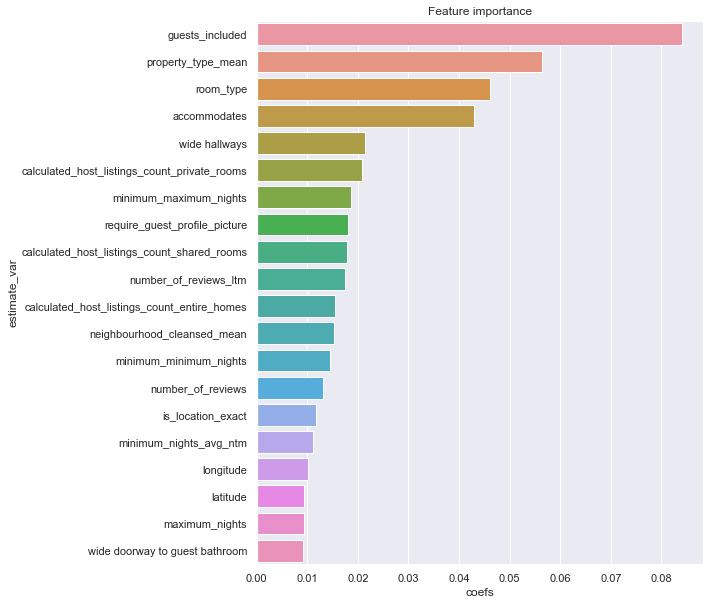

In [362]:
coefs_df = pd.DataFrame()

coefs_df['estimate_var'] = df.drop('price' , axis = 1).columns
coefs_df['coefs'] = model.feature_importances_
coefs_df = coefs_df.sort_values('coefs' , ascending = False).head(20)
plt.figure(figsize =  (8,10))
sns.barplot( coefs_df.coefs ,coefs_df.estimate_var , orient='h')
plt.title('Feature importance')

兩者的變數重要性有蠻多是重疊的，但是不知道為什麼Random forest蠻注意到availability系列的變數，而Xgboost完全不管，不過guest_included , property_type_mean , room_type , accommodate顯然是蠻重要的feature，兩者的情形差不多。

我們可以針對這幾個feature多建立幾個特徵試試看，比如guest_included就可以根據我們的EDA，創建一個「是否為大通鋪（人多但是價格低）」的feature、根據領域知識創建「顧客停留時間的特徵」、收集更多關於城市的資料... 還有許多可以優化的地方。
（畢竟我們初步建立的模型只有62%的解釋能力，說明特徵是不夠的，還有可以放入的特徵）

# 下下次，文本分析

In [390]:
from googletrans import Translator

translator = Translator()

translator.translate(reviews.comments[4] , dest ='zh-tw').text

'Lisa非常高效，住宿功能齊全，所需的一切，乾淨，位於一個安靜和愉快的區域。它的優勢在於，這個工作室靠近新的101市中心。\r\n在台北度過一個月的物有所值。'

In [33]:
reviews = pd.read_csv('/Users/Dennis/Downloads/reviews.csv')
reviews.head()

listing_id         id        date  reviewer_id reviewer_name  \
0       68396    4743816  2013-05-23      3334370         Scott   
1       68396  279164758  2018-06-20    183745170        Yamada   
2       68398    2894700  2012-11-16      3534183         Laura   
3       68398   13416072  2014-05-27     12750484        Maggie   
4       68398   22427468  2014-11-06     21131563       Vincent   

                                            comments  
0  Great location ( very close to the metro stati...  
1                               Very good place!!!\n  
2  I enjoyed my stay very much! Spend approx 6 we...  
3  I ended up staying in Studio B. Apartment is c...  
4  Lisa est très efficace, le logement est foncti...